# Predicting Cyberattacks in CAV using ML
---

## Abstract
---

Connected and Autonomous Vehicles (CAVs) are increasingly vulnerable to cyberattacks, particularly due to vulnerabilities within the Controller Area Network (CAN) protocol, which facilitates communication between Electronic Control Units (ECUs). This study investigates the application of machine learning (ML) for intrusion detection in CAVs, utilizing an experimental dataset from the [Hacking and Countermeasure Research Lab (HCRL)](https://ocslab.hksecurity.net/Datasets/CAN-intrusion-dataset). A **Random Forest (RF) classifier** is employed to identify cyberattacks, trained on **over 3 million records** with a **70:30 train-test split**, utilizing **200 estimators** and a **random state of 11**.

The model achieves an impressive **accuracy exceeding 92%** across a range of attack types, including **Denial-of-Service (DoS), Fuzzy Attacks, Gear Spoofing, and RPM Spoofing**. The data preprocessing techniques implemented in this study, including data cleaning and feature selection, are applicable to other ML applications, such as credit card fraud detection and financial anomaly detection. Given the potential for real-time data availability, this model holds promise for significantly enhancing CAV cybersecurity by detecting and mitigating cyber threats in real-time.


# 1. Data Preparation
---
## 1.1 Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Load Data

In [2]:
dos = pd.read_csv('/kaggle/input/car-hacking-dataset/DoS_dataset.csv')
# fuzzy = pd.read_csv('/kaggle/input/car-hacking-dataset/Fuzzy_dataset.csv')
# gear = pd.read_csv('/kaggle/input/car-hacking-dataset/gear_dataset.csv')
# rpm = pd.read_csv('/kaggle/input/car-hacking-dataset/RPM_dataset.csv')


In [3]:
dos.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
# fuzzy.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
# gear.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
# rpm.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']


In [4]:
dos.shape

(3665770, 12)

In [5]:
dos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665770 entries, 0 to 3665769
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   CAN ID     object 
 2   DLC        int64  
 3   DATA0      object 
 4   DATA1      object 
 5   DATA2      object 
 6   DATA3      object 
 7   DATA4      object 
 8   DATA5      object 
 9   DATA6      object 
 10  DATA7      object 
 11  Flag       object 
dtypes: float64(1), int64(1), object(10)
memory usage: 335.6+ MB


In [6]:
dos.head()

,Timestamp,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


## 1.3 Data Preprocessing
---

### 1.3.2 Drop Timestamp, CAN ID and DLC Columns



In [7]:
dos_cleaned = dos.drop(['Timestamp', 'CAN ID', 'DLC'], axis=1)
dos_cleaned.head()

,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,fe,5b,00,00,00,3c,00,00,R
1,19,21,22,30,08,8e,6d,3a,R
2,64,00,9a,1d,97,02,bd,00,R
3,40,bb,7f,14,11,20,00,14,R
4,d8,00,00,8a,00,00,00,00,R


In [8]:
dos_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665770 entries, 0 to 3665769
Data columns (total 9 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   DATA0   object
 1   DATA1   object
 2   DATA2   object
 3   DATA3   object
 4   DATA4   object
 5   DATA5   object
 6   DATA6   object
 7   DATA7   object
 8   Flag    object
dtypes: object(9)
memory usage: 251.7+ MB


### 1.3.2 Handling Missing Values

In [9]:
dos_cleaned.isnull().sum()


DATA0        0
DATA1        0
DATA2        0
DATA3    31188
DATA4    31188
DATA5    31188
DATA6    31188
DATA7    31188
Flag     31188
dtype: int64

In [10]:
# Drop rows with any missing values
dos_cleaned_na = dos_cleaned.dropna()
dos_cleaned_na.shape

(3634582, 9)

In [11]:
# Drop duplicate rows
dos_df = dos_cleaned_na.drop_duplicates()
dos_df.shape

(66914, 9)

In [12]:
dos_df.describe()

,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
count,66914,66914,66914,66914,66914,66914,66914,66914,66914
unique,108,71,75,26,190,256,75,256,2
top,00,80,00,ff,08,7f,00,00,R
freq,3181,47312,58133,36572,3892,29645,5387,3031,66913


In [13]:
dos_df.isnull().sum()


DATA0    0
DATA1    0
DATA2    0
DATA3    0
DATA4    0
DATA5    0
DATA6    0
DATA7    0
Flag     0
dtype: int64

In [14]:
# Convert hex to integers
df = dos_df.copy()
print(df.dtypes)

DATA0    object
DATA1    object
DATA2    object
DATA3    object
DATA4    object
DATA5    object
DATA6    object
DATA7    object
Flag     object
dtype: object


In [15]:
for col in df.columns[:-1]:  # Exclude 'Flag'
    print(f"{col} unique values: {df[col].unique()[:10]}")  # Show first 10 unique values


DATA0 unique values: ['fe' '19' '64' '40' 'd8' '00' '14' '08' 'e5' '05']
DATA1 unique values: ['5b' '21' '00' 'bb' '80' '7f' '20' '40' '27' '84']
DATA2 unique values: ['00' '22' '9a' '7f' '10' '14' '60' '68' '27' '24']
DATA3 unique values: ['00' '30' '1d' '14' '8a' 'ff' '68' '09' '80' '23']
DATA4 unique values: ['00' '08' '97' '11' '31' '48' '77' '7e' 'ff' '21']
DATA5 unique values: ['3c' '8e' '02' '20' '00' '03' 'ff' '80' '7f' '22']
DATA6 unique values: ['00' '6d' 'bd' '0b' '2b' '08' 'd1' '0c' '2c' '0d']
DATA7 unique values: ['00' '3a' '14' '11' '7f' 'ac' 'a3' '2e' '6f' '07']


In [16]:
def hex_to_int(x):
    try:
        return int(str(x).strip(), 16)  # Ensure string format and remove spaces
    except ValueError:
        return np.nan  # Assign NaN for invalid values

df = dos_df.copy()
for col in df.columns[:-1]:  # Exclude 'Flag'
    df[col] = df[col].apply(hex_to_int)


In [17]:
df.head()

,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,254,91,0,0,0,60,0,0,R
1,25,33,34,48,8,142,109,58,R
2,100,0,154,29,151,2,189,0,R
3,64,187,127,20,17,32,0,20,R
4,216,0,0,138,0,0,0,0,R


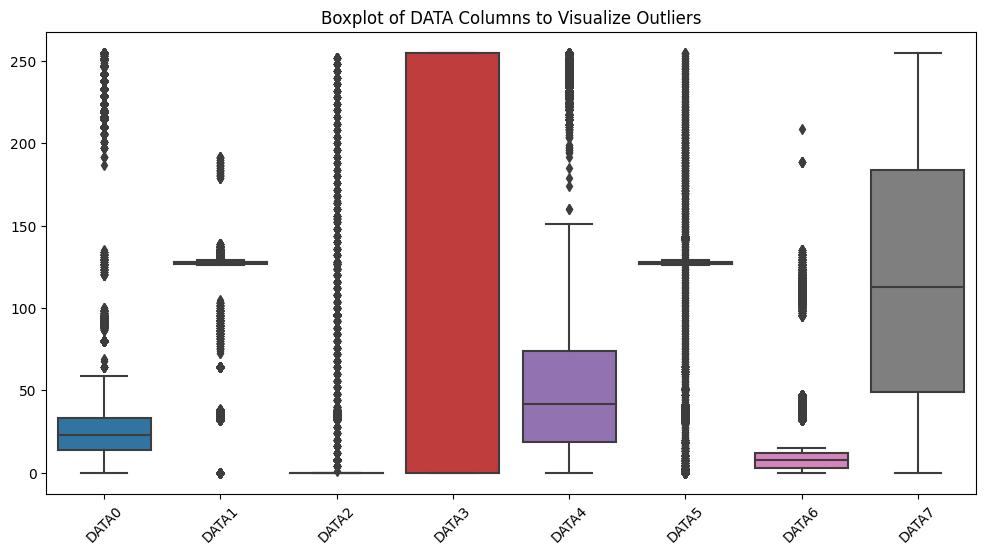

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

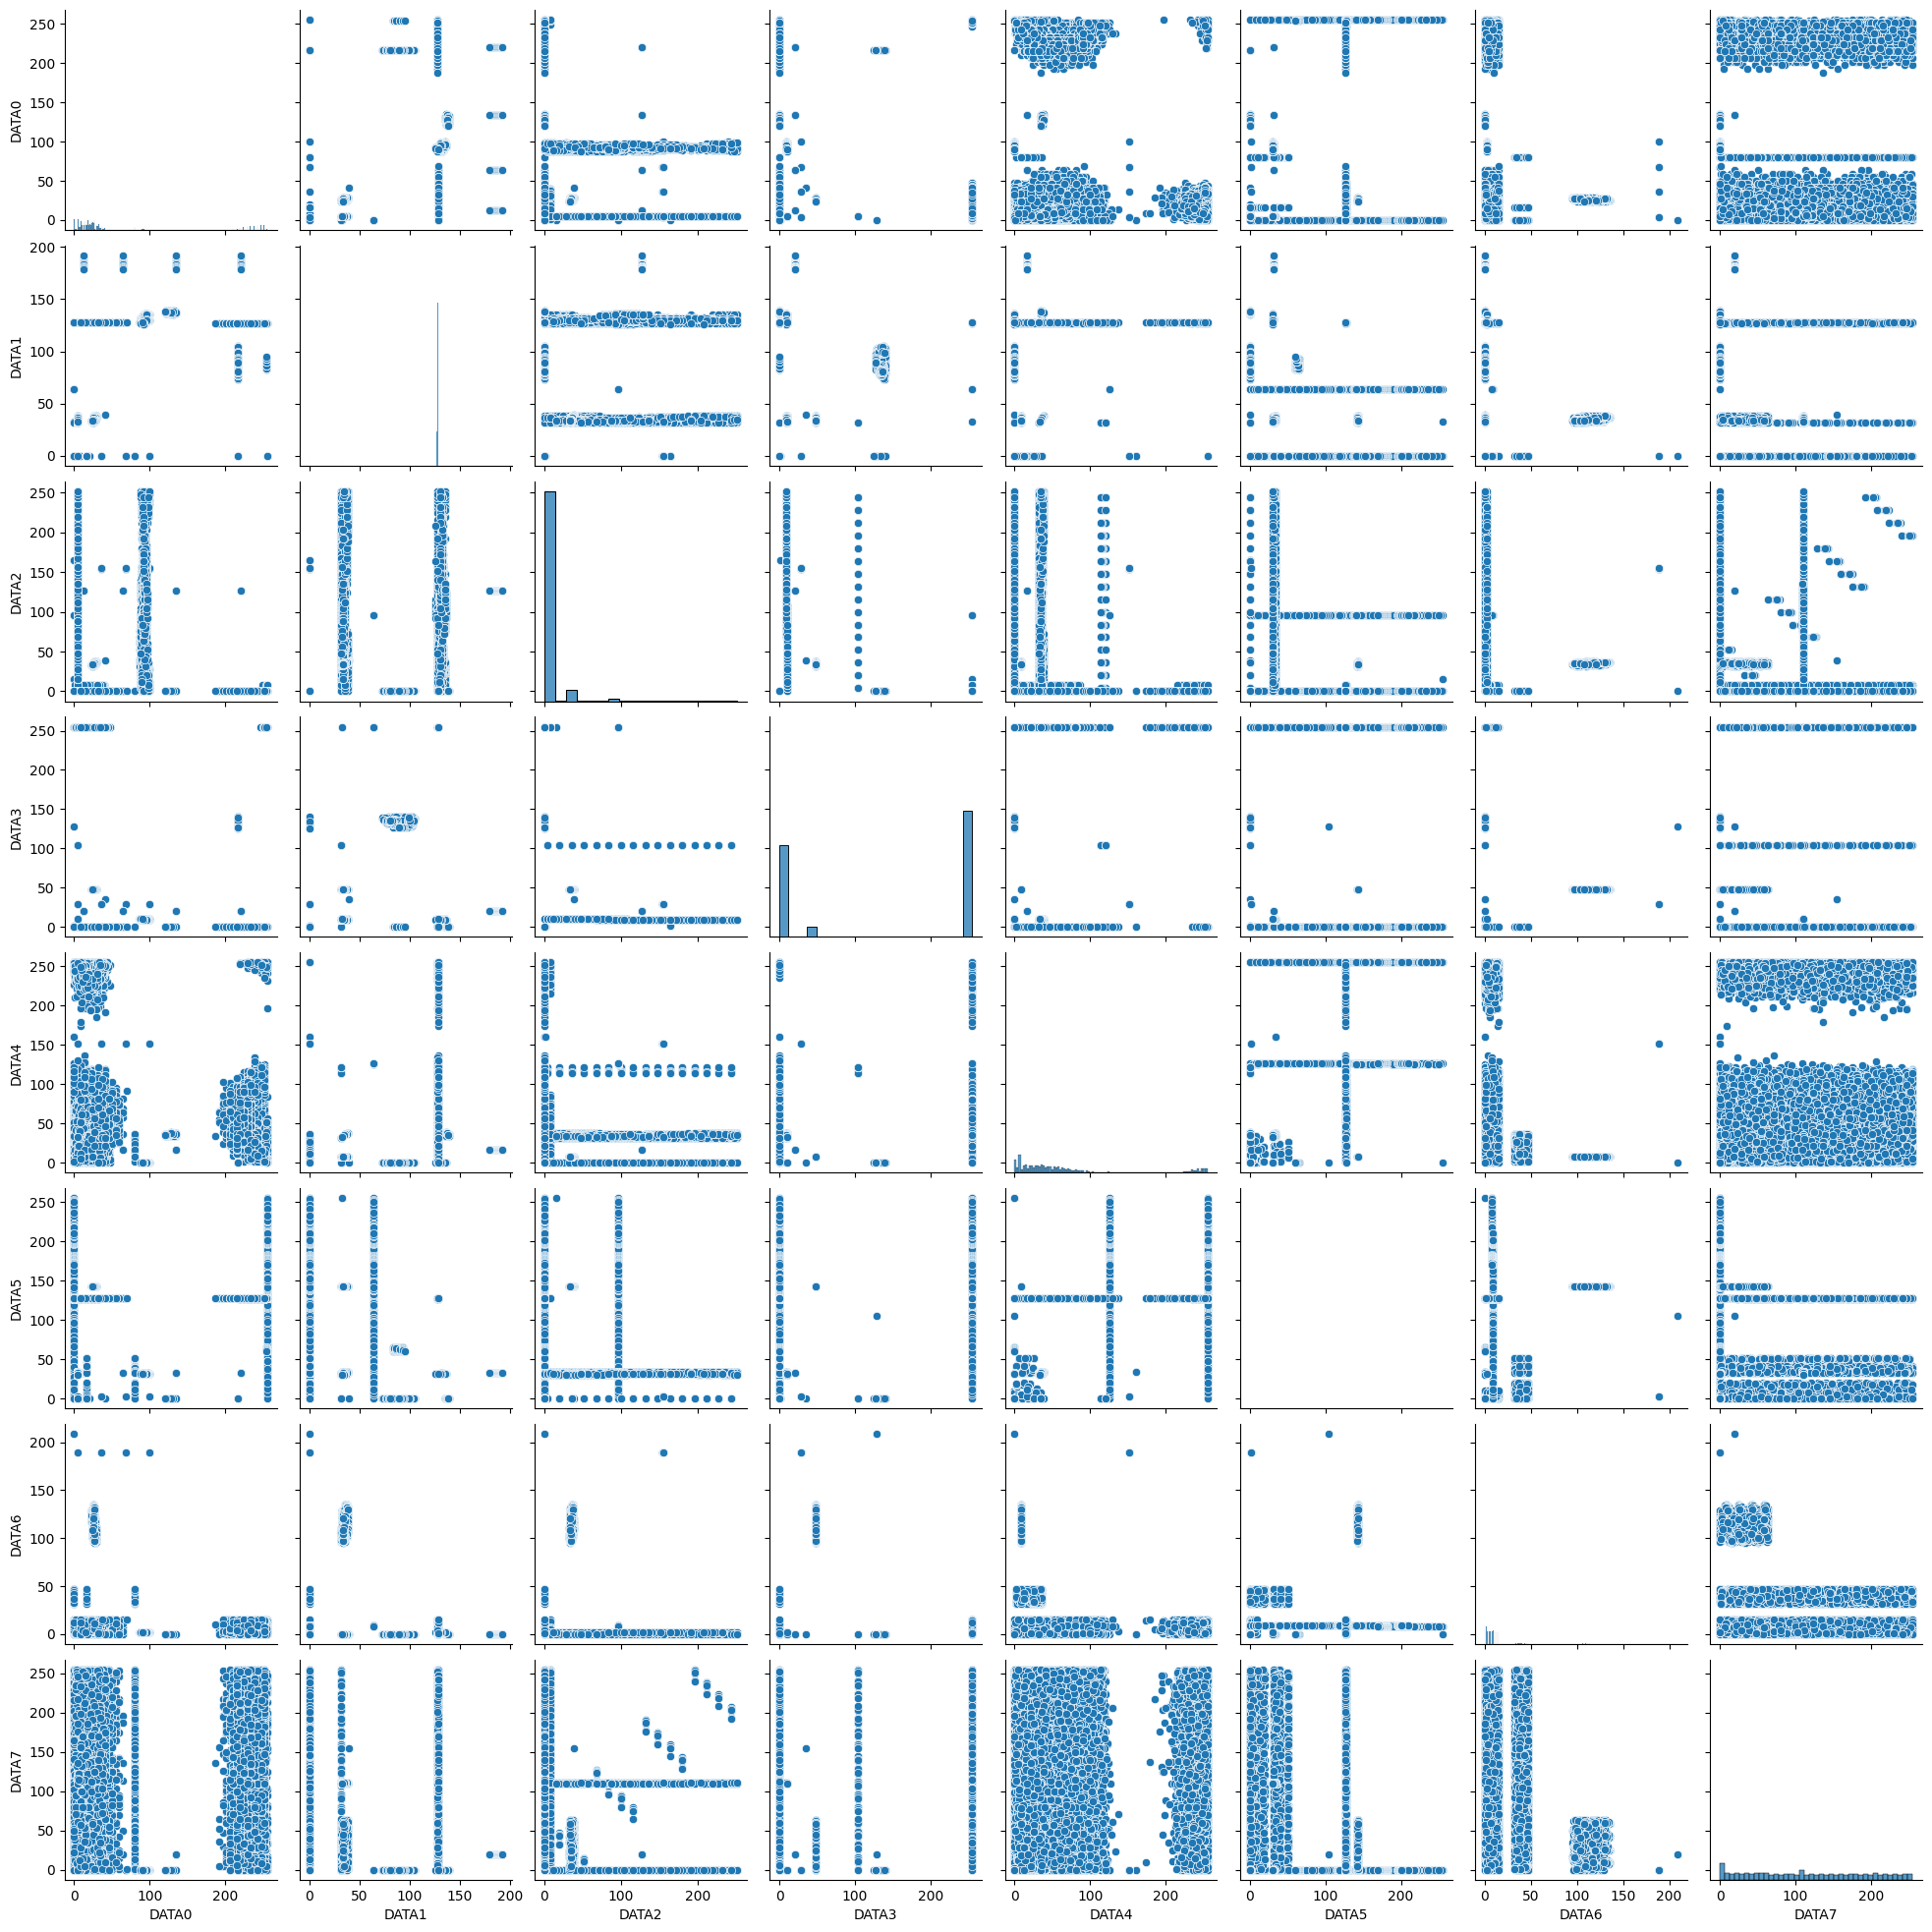

In [18]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude 'Flag' column
plt.title("Boxplot of DATA Columns to Visualize Outliers")
plt.xticks(rotation=45)
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df.iloc[:, :-1])
plt.show()